# Limpieza de Base de Datos de Hechos Delictivos en Argentina (2017-2021)

En este documento Markdown se describirá el proceso de limpieza de una base de datos de hechos delictivos ocurridos en Argentina durante el período comprendido entre los años 2017 y 2021. El objetivo de esta limpieza es obtener información relevante para responder las siguientes preguntas:

- 1. ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?

- 2. ¿Cuáles son los departamentos con mayor número de delitos?

- 3. ¿Cuáles son los motivos más comunes que originaron el registro de un delito?

- 4. ¿Existe alguna relación entre el mes del año y la cantidad de delitos?

- 5. ¿Hay alguna relación entre el lugar y el género del inculpado?

- 6. ¿Hay alguna relación entre el lugar y el género de la víctima?

## Recopilación de la base de datos

Se trabaja con una base de datos  sobre los hechos delictivos ocurridos en Argentina entre los años 2017 y 2021.

## Analisis y Limpieza de datos

- Analizar los tipos de datos presentes en el dataframe y realizar una primera visualización para obtener una visión general de los datos.

### Información del dataframe y verificación de datos nulos

- Obtener información detallada sobre el dataframe, incluyendo la cantidad de datos en cada fila y la presencia de valores nulos, se puede utilizar el método `info()`. A continuación se muestra el código necesario:

### Limpieza
- Eliminar registros duplicados: Se eliminarán aquellos registros que sean duplicados para evitar distorsiones en los análisis posteriores.



In [6]:
import pandas as pd
import numpy as np

In [4]:

path = '../../datos/brutos/SAT-HD-BU_2017-2021.csv'
df = pd.read_csv(path)

/tmp/ipykernel_72118/751627683.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


### Averiguo el tamaño del dataframe (Filas x Columnas)

Para obtener el tamaño del dataframe y conocer la cantidad de filas y columnas, se puede utilizar la propiedad `shape` del dataframe. A continuación se muestra el código necesario:

```python
data.shape


In [ ]:
df.shape ###( Filas x Columnas)

In [ ]:
### Que tipos de datos tengo
df.dtypes

### Visualización de las primeras filas del dataframe

Para visualizar las primeras filas del dataframe y tener una idea de los datos que contiene, se puede utilizar el método `head()`. A continuación se muestra el código necesario:

```python
data.head()

In [ ]:
df.head(10)

### Información del dataframe y verificación de datos nulos

Para obtener información detallada sobre el dataframe, incluyendo la cantidad de datos en cada fila y la presencia de valores nulos, se puede utilizar el método `info()`. A continuación se muestra el código necesario:

```python
dataframe.info()

In [ ]:
df.info()

# Elimino columnas innecesarias
genero un dataframe para limpiar las columnas que no utilizaremos.

In [8]:
#Lista de convenciones de valores faltantes

common_na_strings = [
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
    'No corresponde',
    'Sin determinar']

In [9]:
#Se eliminan columnas que no se utilizaran
df_limpio = df.drop(columns=['federal','Cod_INDEC_Prov','Cod_INDEC','departamento','codigo_localidad','radio_censal','latitud_radio','longitud_radio','otro_tipo_lugar','otro_clase_arma','otro_en_ocasion_otro_delito','otro_motivo_origen_registro','identidad_genero_victima','otro_identidad_genero_victima','otro_clase_victima','situacion_ocupacional_victima','otro_situacion_ocupacional_victi','identidad_genero_inculpado','otro_identidad_genero_inculpado','clase_inculpado','otro_clase_inculpado','cant_inc','clase_arma','en_ocasion_otro_delito','motivo_origen_registro','tipo_hecho_segun_victima','codigo_departamento'])

In [10]:
#Se utiliza las posibles convenciones de valores faltantes para remplazarlo por NaN
df_limpio.replace(
        to_replace=common_na_strings, #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,tr_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,14/1/2017,22:38:00,Imputado idRegistro 12929,Imputado,NaN,NaN,NaN,Masculino,NaN,Sin relación,NaN,1
1,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,14/1/2017,22:38:00,Imputado idRegistro 12930,Imputado,NaN,NaN,NaN,Masculino,NaN,Sin relación,NaN,1
2,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,14/1/2017,22:38:00,Imputado idRegistro 12931,Imputado,NaN,NaN,NaN,Masculino,NaN,Sin relación,NaN,1
3,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,14/1/2017,22:38:00,Víctima idRegistro 12235,Víctima,Masculino,45-49,Civil,NaN,NaN,NaN,Sin relación,1
4,11536,NEUQUEN,Cutral Có,2017,1,Vía pública,Vía pública,7/1/2017,10:35:00,Imputado idRegistro 12932,Imputado,NaN,NaN,NaN,Masculino,30-34,Sin relación,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,28129,BUENOS AIRES,Florencio Varela,2021,11,Vía pública,Vía pública,10/11/2021,11:11:11,Víctima idRegistro 29888,Víctima,Masculino,45-49,Civil,NaN,NaN,NaN,Otras relaciones no familiares,1
25156,28253,TIERRA DEL FUEGO,Ushuaia,2021,7,Domicilio particular,Domicilio particular,4/7/2021,12:00:00,Imputado idRegistro 32993,Imputado,NaN,NaN,NaN,Femenino,25-29,Conyuge/ pareja,NaN,1
25157,28253,TIERRA DEL FUEGO,Ushuaia,2021,7,Domicilio particular,Domicilio particular,4/7/2021,12:00:00,Víctima idRegistro 30020,Víctima,Masculino,25-29,Civil,NaN,NaN,NaN,Conyuge/ pareja,1
25158,28263,ENTRE RIOS,Concordia,2017,12,Vía pública,Vía pública,25/12/2017,11:11:11,Imputado idRegistro 33004,Imputado,NaN,NaN,NaN,Masculino,30-34,Sin relación,NaN,1


### Grafica de valores faltantes

In [11]:
import missingno as msno

<AxesSubplot:>

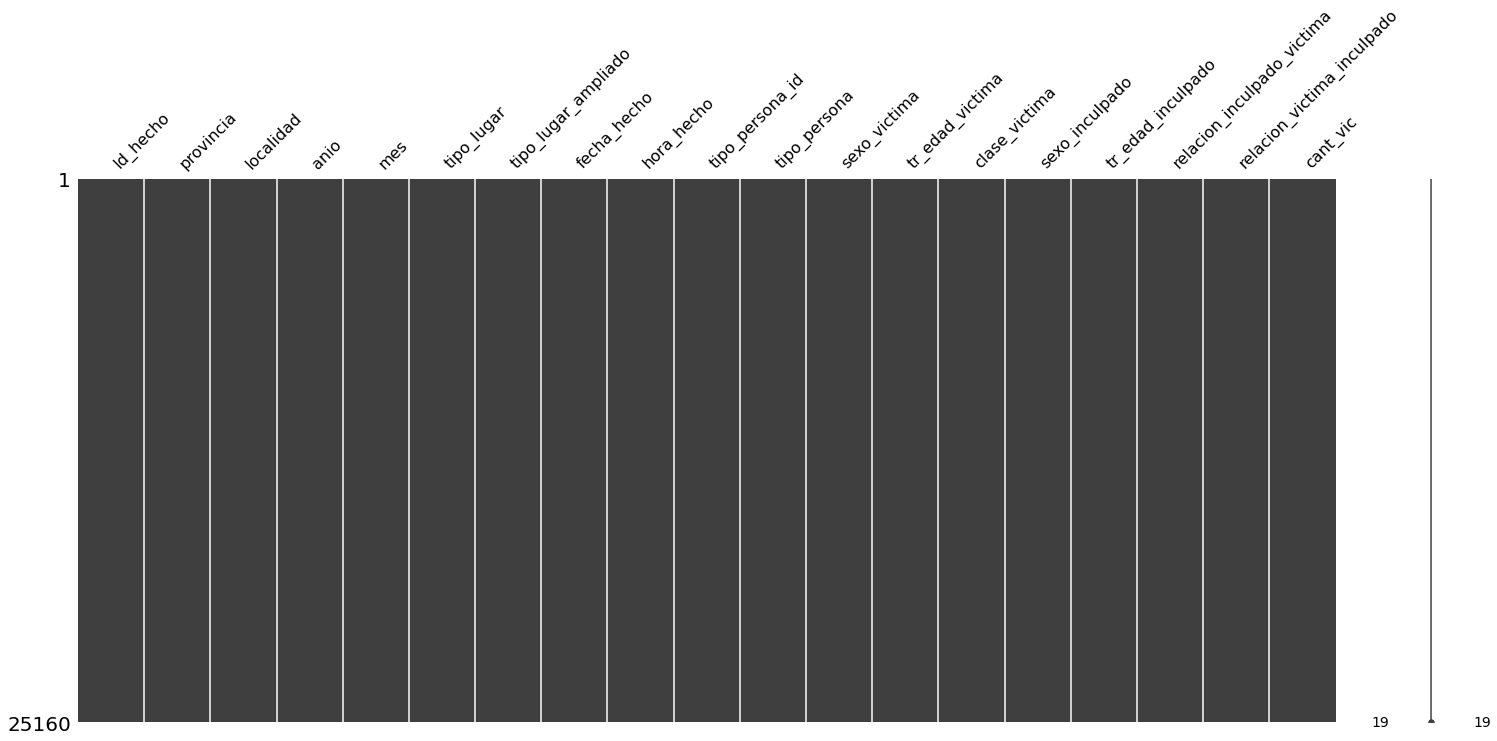

In [13]:
msno.matrix(df_limpio)

In [ ]:
df_limpio.info()

### Elimino los registros - Al interesarme el aspecto de la victima elijo este registro

Generamos un nuevo dataframe conservando todas las columnas del original, pero solo incluyendo las filas con valores "Víctima" en la columna 'tipo_persona' y 'sexo_victima'. Esto nos permite tener un 

dataframe con información unica en dicha columna.

In [ ]:
df_victimas = df[df['tipo_persona'] == 'Víctima'][['Id_hecho', 'tipo_persona','sexo_victima']]

In [ ]:
df_victimas

### Guardado del CSV limpio


In [ ]:
ruta_destino = "../../datos/procesados/limpieza01_argentina_delitos.csv"  # Ruta y nombre del archivo de destino
df_limpio.to_csv(ruta_destino, index=False)